In [1]:
# Aggregation plot centered at DNase-seq specific, common, or Footprint-C specific peak summits. The contact matrices were aggregated around summits ±1000 kb at 10-kb resolution.
# 1. takes file: .mcool file and loop file
#    applies tool: cooler and cooltools
#    produces output: Aggregate plots


# If you are a developer, you may want to reload the packages on the fly
# Jupyter has a magic for this particular purpose

%load_ext autoreload
%autoreload 2

# import standard python libraries

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

# import libraries for biological data analysis

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
# set resolution
# load cool file

resolution = 10000
clr_1 = cooler.Cooler(f'DNaseC_K562_8ulDNase.mcool::/resolutions/{resolution}')


#clr = cooler.Cooler(f'DNaseC_293T_siSCR_R1r0_val_trimLk3.5kb.cool')
#clr_RAD21_KD = cooler.Cooler(f'DNaseC_293T_siRAD21_R1r0_val_trimLk3.5kb.cool')

In [3]:
# Use bioframe to fetch the genomic features

hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

# Select only chromosomes that are present in the cooler

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

# call this to automaticly assign names to chromosomal arms

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [4]:
# load coordinates of DNase-seq specific, common, or Footprint-C specific peak summits

sites_1 = bioframe.read_table('venn_overlap_and_specific/K562_DNase_seq_specific.bed', schema='bed')
sites_2 = bioframe.read_table('venn_overlap_and_specific/K562_common.bed', schema='bed')
sites_3 = bioframe.read_table('venn_overlap_and_specific/K562_footprint_C_specific.bed', schema='bed')
#sites = bioframe.read_table('/mnt/disk1/6/lxk/private/HiChIP/Total_HiChIP/293T/dimer/homer/CTCF/pair_class/CTCF-X/AGGTCA/profile/AGGTCA_u.motif', schema='bed')
#sites = bioframe.read_table('/mnt/disk1/6/lxk/private/HiChIP/Total_HiChIP/293T/dimer/homer/CTCF/pair_class/CTCF-X/AGGTCA/profile/CTCF_u.motif', schema='bed')

#sites = ctcf.sort_values('score', ascending=False).head(1000)

In [5]:
# perform pileups

pup_1 = coolpup.pileup(clr_1, sites_1, features_format='bed', view_df=hg38_arms, local=True,
                        flip_negative_strand=True, nshifts=10,
                        flank=1000000, min_diag=2, nproc=80)

INFO:coolpuppy:('chr13_p', 'chr13_p'): 1
INFO:coolpuppy:('chr22_p', 'chr22_p'): 17
INFO:coolpuppy:('chr21_p', 'chr21_p'): 23
INFO:coolpuppy:('chrY_q', 'chrY_q'): 2
INFO:coolpuppy:('chr20_p', 'chr20_p'): 465
INFO:coolpuppy:('chr5_p', 'chr5_p'): 513
INFO:coolpuppy:('chr18_p', 'chr18_p'): 368
INFO:coolpuppy:('chr9_p', 'chr9_p'): 596
INFO:coolpuppy:('chr21_q', 'chr21_q'): 598
INFO:coolpuppy:('chr4_p', 'chr4_p'): 792
INFO:coolpuppy:('chr18_q', 'chr18_q'): 819
INFO:coolpuppy:('chr10_p', 'chr10_p'): 742
INFO:coolpuppy:('chrX_p', 'chrX_p'): 1020
INFO:coolpuppy:('chr17_p', 'chr17_p'): 911
INFO:coolpuppy:('chr12_p', 'chr12_p'): 805
INFO:coolpuppy:('chr8_p', 'chr8_p'): 877
INFO:coolpuppy:('chr7_p', 'chr7_p'): 983
INFO:coolpuppy:('chr20_q', 'chr20_q'): 1269
INFO:coolpuppy:('chr11_p', 'chr11_p'): 1171
INFO:coolpuppy:('chr16_q', 'chr16_q'): 1195
INFO:coolpuppy:('chr16_p', 'chr16_p'): 1247
INFO:coolpuppy:('chr13_q', 'chr13_q'): 1395
INFO:coolpuppy:('chrX_q', 'chrX_q'): 1287
INFO:coolpuppy:('chr19_q',

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


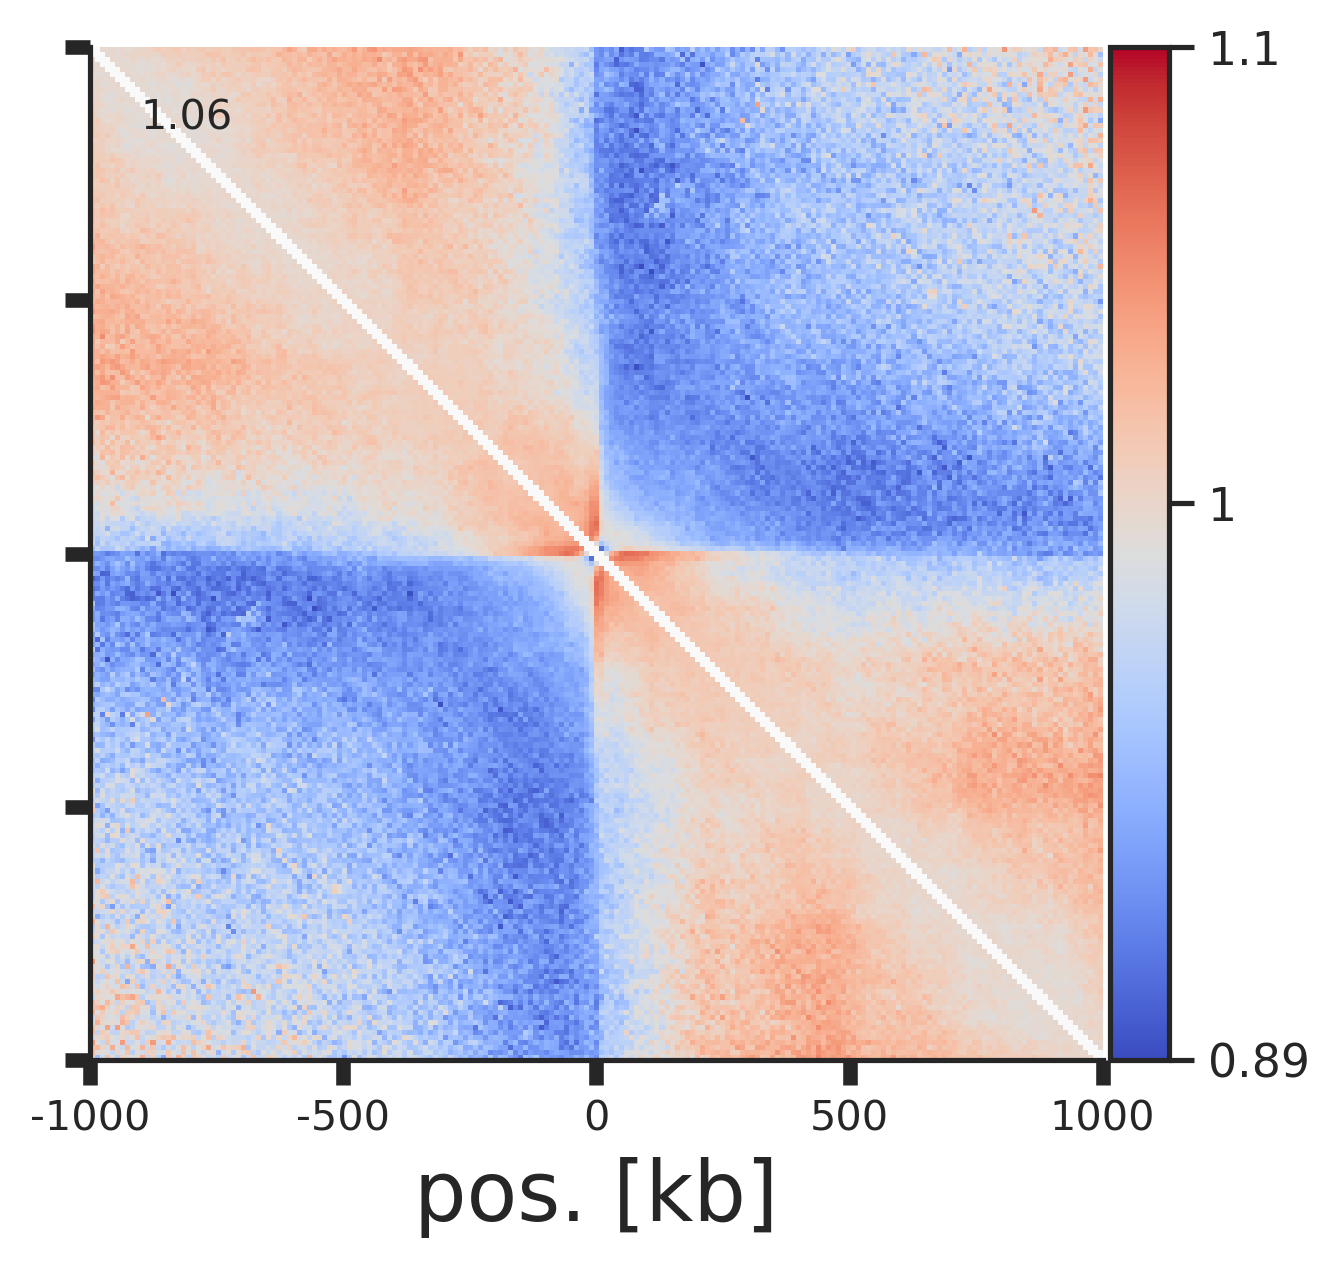

In [6]:
# visualize

fig1 = plotpup.plot(pup_1,
            score=True, cmap='coolwarm', scale='log',
             sym=True, 
             vmax=1.1,
             vmin=0.89,
             height=5, 
             plot_ticks=True)

In [7]:
# save .pdf file

fig1.savefig('K562_DNase_seq_specific.pdf')

In [8]:
# perform pileups

pup_2 = coolpup.pileup(clr_1, sites_2, features_format='bed', view_df=hg38_arms, local=True,
                        flip_negative_strand=True, nshifts=10,
                        flank=1000000, min_diag=2, nproc=80)

INFO:coolpuppy:('chr22_p', 'chr22_p'): 1
INFO:coolpuppy:('chr21_p', 'chr21_p'): 3
INFO:coolpuppy:('chr18_p', 'chr18_p'): 110
INFO:coolpuppy:('chr9_p', 'chr9_p'): 217
INFO:coolpuppy:('chr17_p', 'chr17_p'): 281
INFO:coolpuppy:('chr20_p', 'chr20_p'): 293
INFO:coolpuppy:('chr18_q', 'chr18_q'): 361
INFO:coolpuppy:('chr5_p', 'chr5_p'): 342
INFO:coolpuppy:('chr12_p', 'chr12_p'): 373
INFO:coolpuppy:('chr21_q', 'chr21_q'): 354
INFO:coolpuppy:('chr4_p', 'chr4_p'): 420
INFO:coolpuppy:('chrX_q', 'chrX_q'): 405
INFO:coolpuppy:('chrX_p', 'chrX_p'): 337
INFO:coolpuppy:('chr13_q', 'chr13_q'): 560
INFO:coolpuppy:('chr16_p', 'chr16_p'): 495
INFO:coolpuppy:('chr8_p', 'chr8_p'): 477
INFO:coolpuppy:('chr10_p', 'chr10_p'): 495
INFO:coolpuppy:('chr20_q', 'chr20_q'): 672
INFO:coolpuppy:('chr22_q', 'chr22_q'): 658
INFO:coolpuppy:('chr16_q', 'chr16_q'): 677
INFO:coolpuppy:('chr19_p', 'chr19_p'): 823
INFO:coolpuppy:('chr11_p', 'chr11_p'): 694
INFO:coolpuppy:('chr19_q', 'chr19_q'): 922
INFO:coolpuppy:('chr15_q', 

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


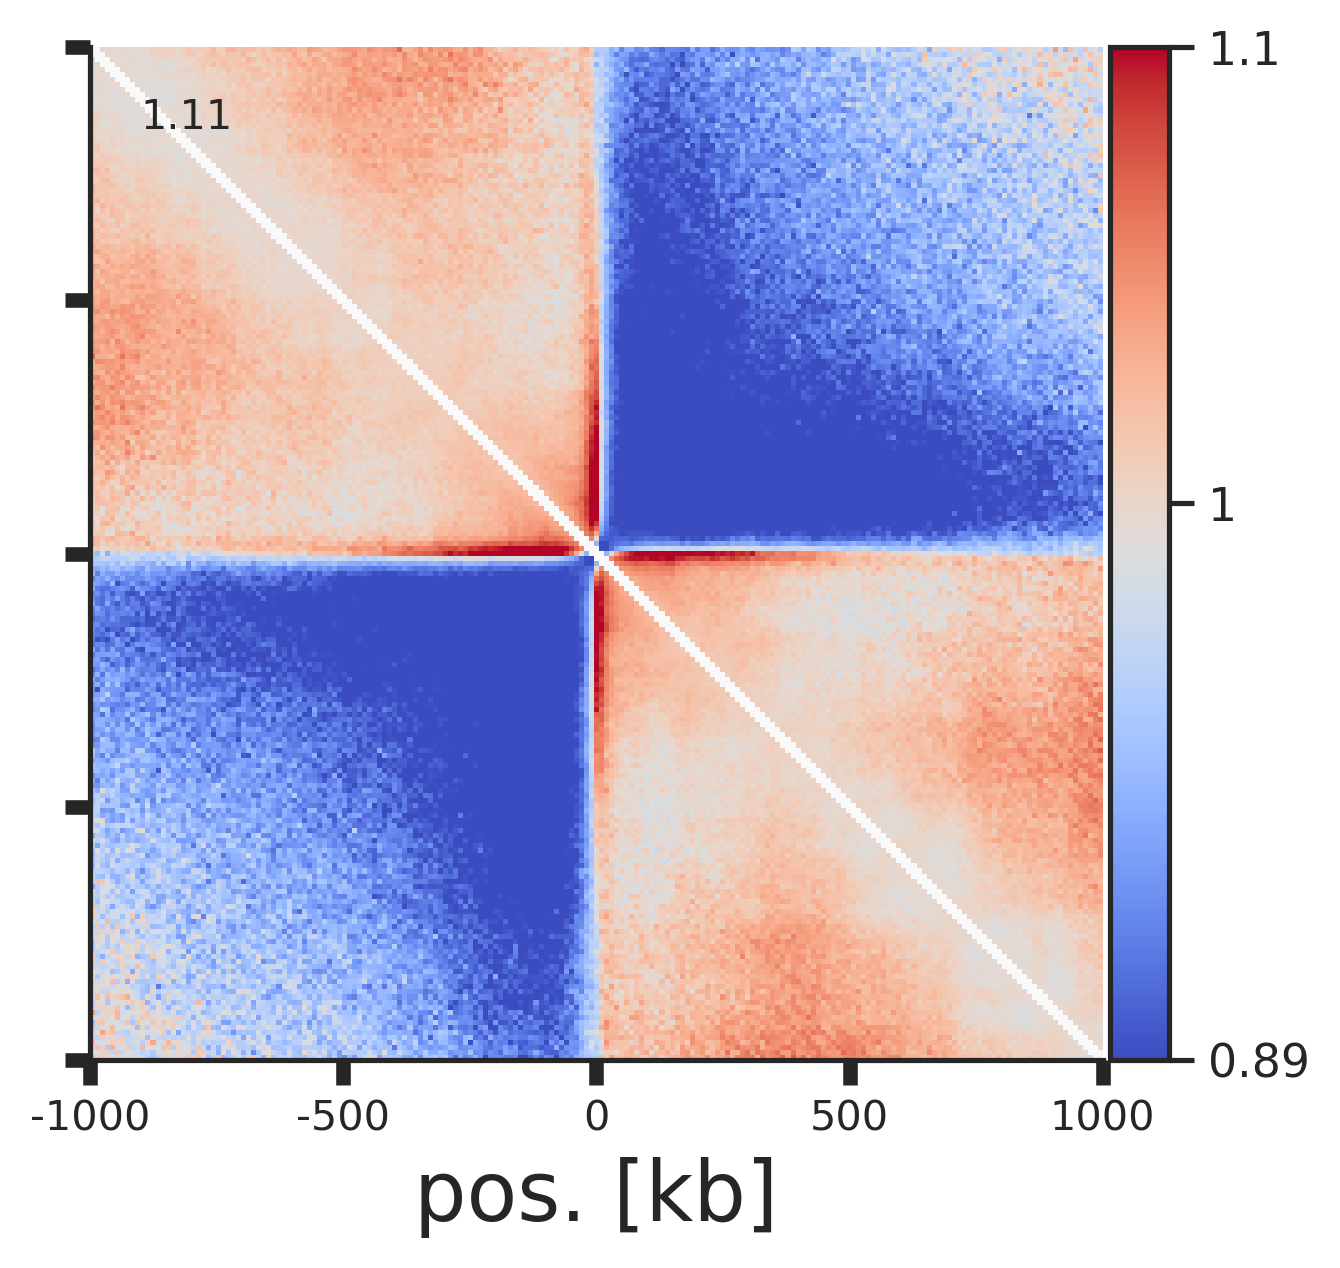

In [9]:
# visualize

fig2 = plotpup.plot(pup_2,
            score=True, cmap='coolwarm', scale='log',
             sym=True, 
             vmax=1.1,
             vmin=0.89,
             height=5, 
             plot_ticks=True)

In [10]:
# save .pdf file

fig2.savefig('K562_common.pdf')

In [11]:
# perform pileups

pup_3 = coolpup.pileup(clr_1, sites_3, features_format='bed', view_df=hg38_arms, local=True,
                        flip_negative_strand=True, nshifts=10,
                        flank=1000000, min_diag=2, nproc=80)

INFO:coolpuppy:('chr22_p', 'chr22_p'): 4
INFO:coolpuppy:('chr21_p', 'chr21_p'): 20
INFO:coolpuppy:('chr18_p', 'chr18_p'): 30
INFO:coolpuppy:('chr17_p', 'chr17_p'): 43
INFO:coolpuppy:('chrX_p', 'chrX_p'): 67
INFO:coolpuppy:('chr18_q', 'chr18_q'): 107
INFO:coolpuppy:('chr9_p', 'chr9_p'): 66
INFO:coolpuppy:('chrX_q', 'chrX_q'): 90
INFO:coolpuppy:('chr16_p', 'chr16_p'): 189
INFO:coolpuppy:('chr20_p', 'chr20_p'): 113
INFO:coolpuppy:('chr12_p', 'chr12_p'): 124
INFO:coolpuppy:('chr19_q', 'chr19_q'): 210
INFO:coolpuppy:('chr20_q', 'chr20_q'): 219
INFO:coolpuppy:('chr19_p', 'chr19_p'): 172
INFO:coolpuppy:('chr14_q', 'chr14_q'): 205
INFO:coolpuppy:('chr15_q', 'chr15_q'): 178
INFO:coolpuppy:('chr4_p', 'chr4_p'): 197
INFO:coolpuppy:('chr10_p', 'chr10_p'): 216
INFO:coolpuppy:('chr8_p', 'chr8_p'): 214
INFO:coolpuppy:('chr3_q', 'chr3_q'): 249
INFO:coolpuppy:('chr5_p', 'chr5_p'): 259
INFO:coolpuppy:('chr16_q', 'chr16_q'): 251
INFO:coolpuppy:('chr21_q', 'chr21_q'): 250
INFO:coolpuppy:('chr11_p', 'chr11

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


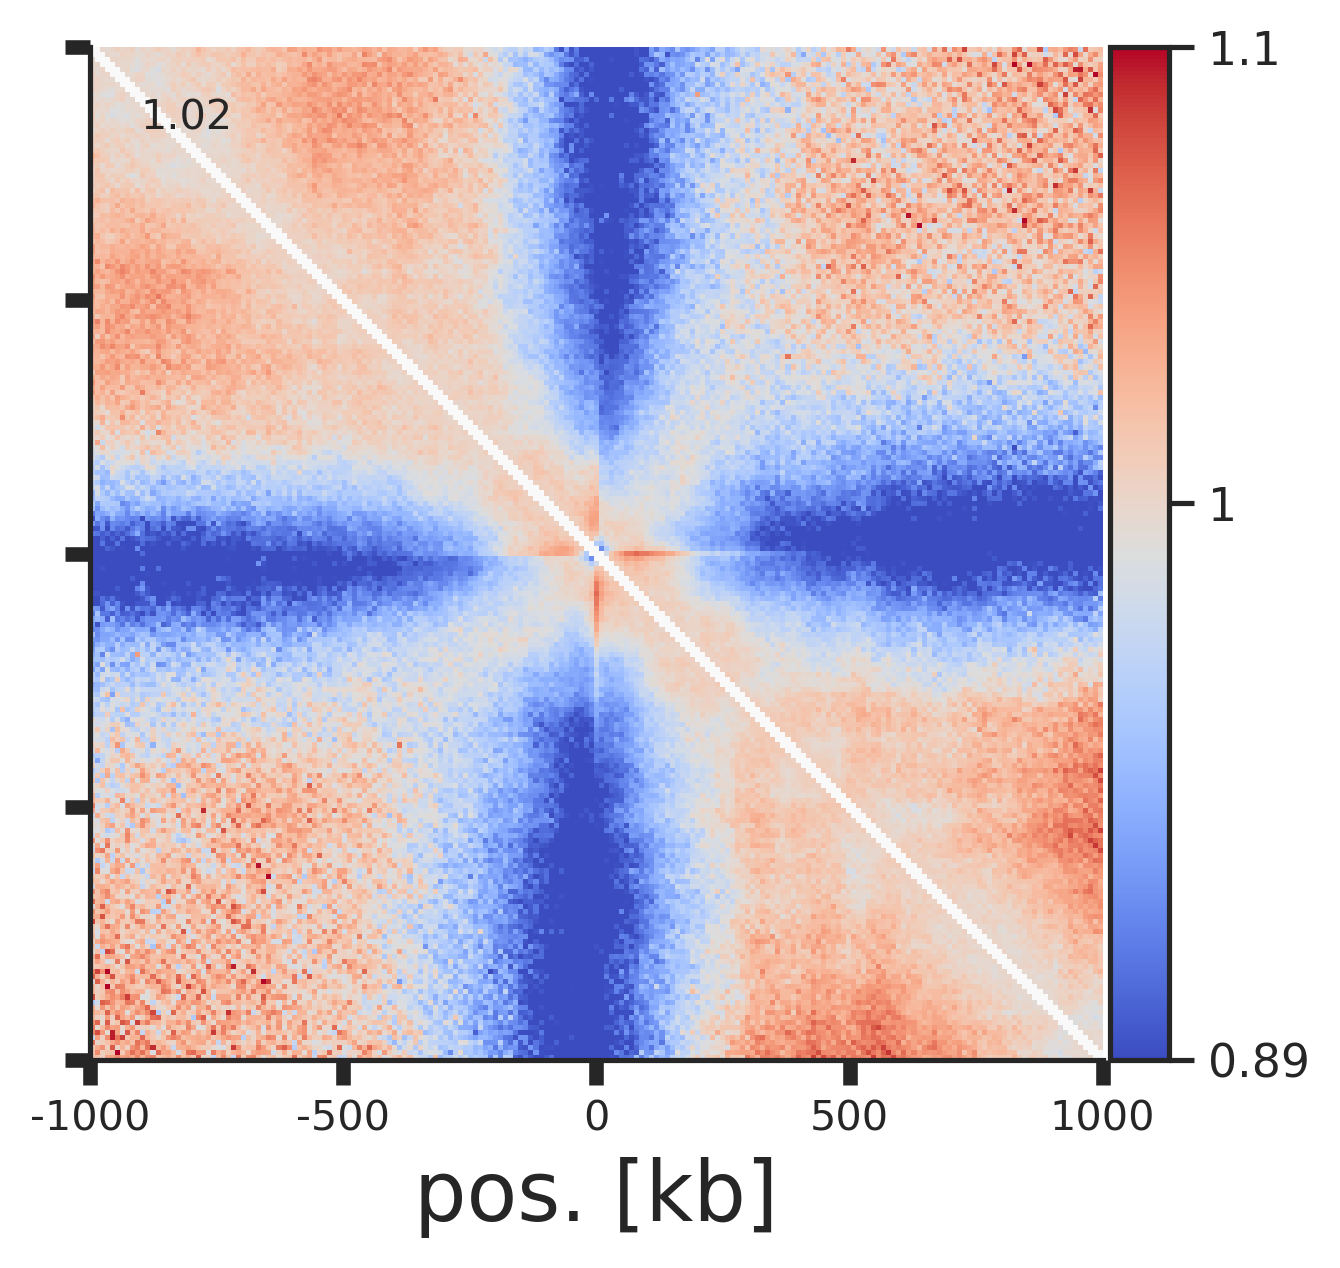

In [12]:
# visualize

fig3 = plotpup.plot(pup_3,
            score=True, cmap='coolwarm', scale='log',
             sym=True, 
              vmax=1.1,
              vmin=0.89,
             height=5, 
             plot_ticks=True)

In [13]:
# save .pdf file

fig3.savefig('K562_footprint_C_specific.pdf')